In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df_train.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']

In [6]:
df_train[features].head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd
0,1710,3,2,1,8
1,1262,3,2,0,6
2,1786,3,2,1,6
3,1717,3,1,0,7
4,2198,4,2,1,9


In [7]:
#statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

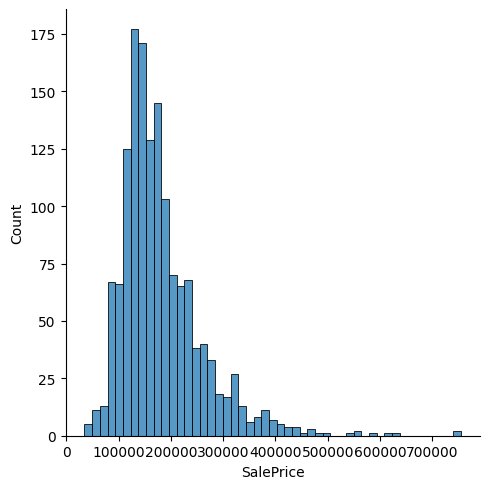

In [8]:
#histogram of sales price
sns.displot(df_train['SalePrice'])

In [9]:
# skewness and kurtosis of sales price
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [10]:
df_train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [11]:
df_train['SalePrice'].isnull().sum()

0

In [12]:
#applying log transformation
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

/tmp/ipykernel_8923/2695469016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

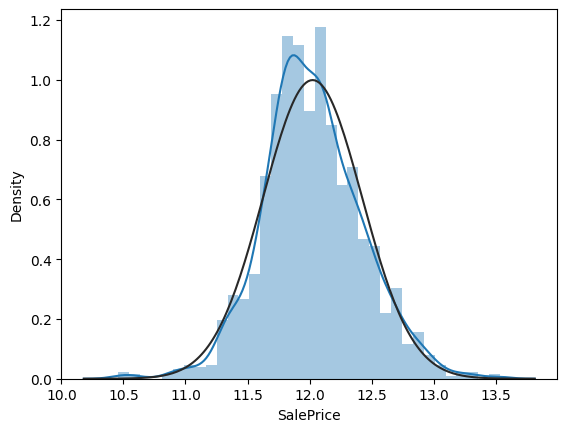

In [13]:
sns.distplot(df_train['SalePrice'], fit=norm)

In [14]:
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])

In [15]:
train = df_train[features]
target = df_train['SalePrice']
print(target)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pre = model.predict(x_test)

In [18]:
mse = mean_squared_error(y_test, y_pre)
r2 = r2_score(y_test, y_pre)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  0.06294519300837845
RMSE:  0.25088880606431696
R2:  0.5842404445272202


Text(0.5, 1.0, 'Linear Regression Model')

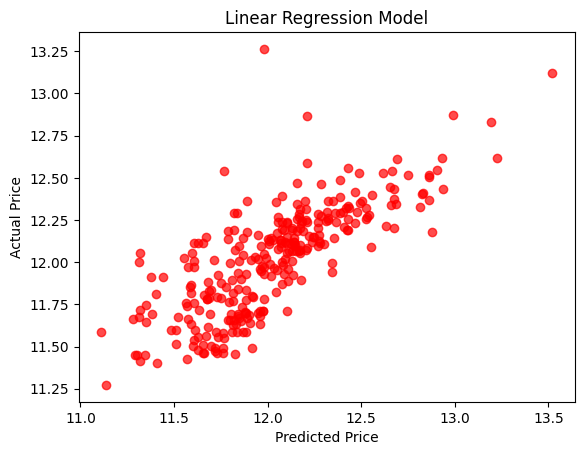

In [19]:
plt.scatter(y_test, y_pre, alpha=0.7, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [20]:
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])

final_predic = df_test[features]

In [21]:
test_predict = model.predict(final_predic)
print(test_predict)

[11.61979637 11.86796948 12.21614659 ... 11.63035076 11.55749647
 12.37309173]


since we did a logarithmic transform to the target variable. So, the result is also in logarithmic scale. To obtain result in orignal scale, we can apply the ihnverse of the logarithmic transformation

In [22]:
prediction = np.exp(test_predict)
print(prediction)

[111279.05847478 142624.34232724 202024.97144441 ... 112459.76143243
 104557.92196466 236355.36268268]
